In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
time = np.arange(3*365+2)

In [3]:
def trend(time,slope=0.1):
    return time * slope

In [7]:
def plot_series(time,series):
    plt.figure(figsize=(10,10))
    plt.grid(True)
    plt.plot(time,series)
    plt.xlabel("time")
    plt.ylabel("series")
    plt.show()

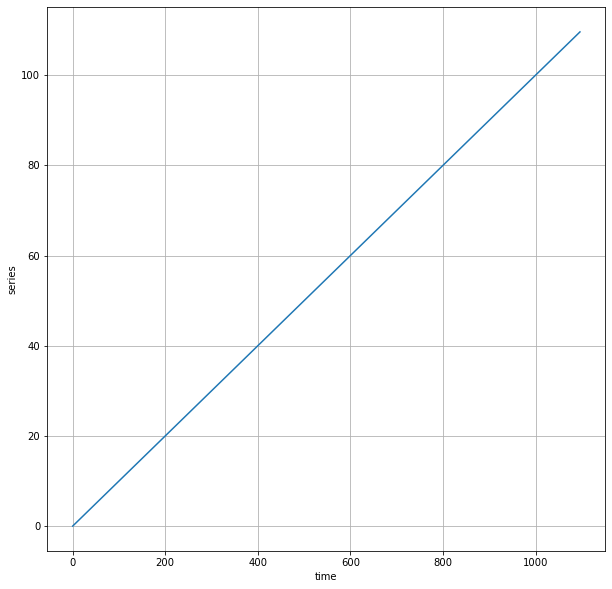

In [8]:
series=trend(time)
plot_series(time,series)

In [42]:
def seasonal_pattern(series):
    return np.where(series<0.5,np.cos(series),np.sin(series))
def seasonality(time,amplitude=10,period=365,phase=0):
    season_pattern = ((time+phase)%period)/period
    return seasonal_pattern(season_pattern)*amplitude

In [43]:
series = seasonality(time,10)

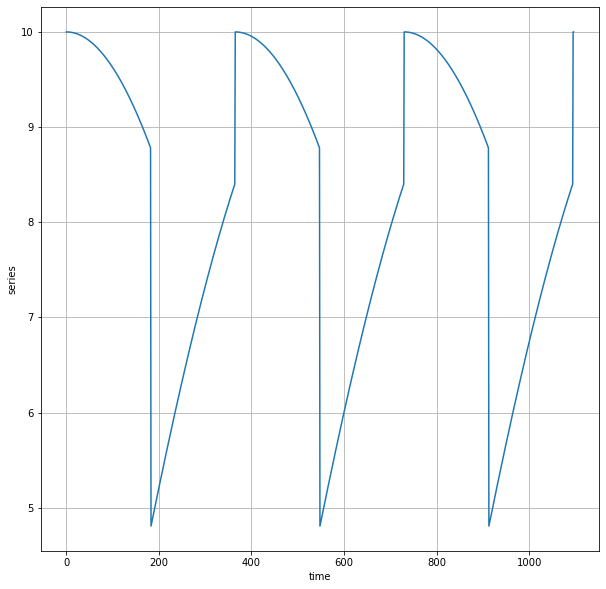

In [44]:
plot_series(time,series)

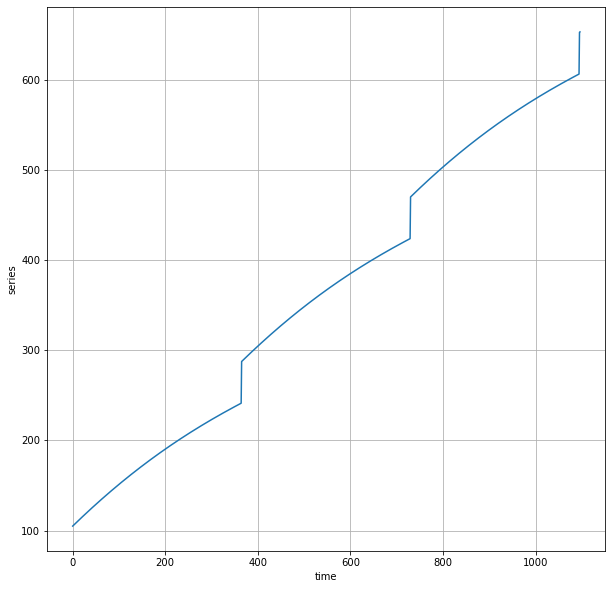

In [40]:
baseline = 5
amplitude = 100
series = baseline + trend(time,slope=0.5)+ seasonality(time, period=365, amplitude=amplitude)
plot_series(time, series)

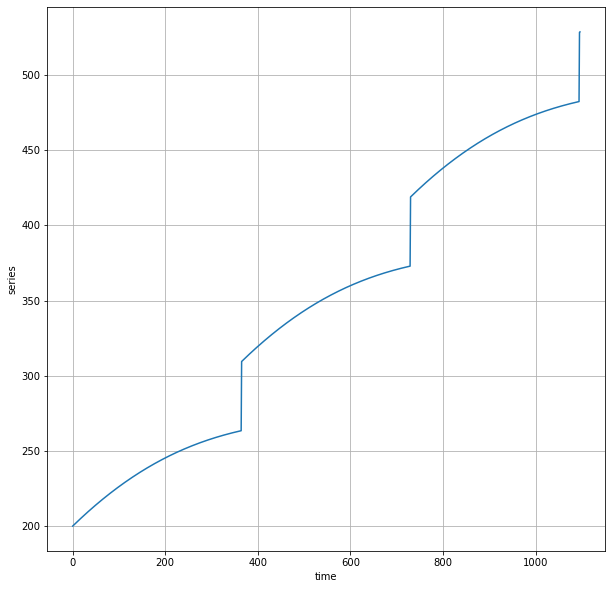

In [41]:
baseline=100
series = 100 +trend(time,slope=0.3)+seasonality(time,amplitude=100)
plot_series(time,series)

In [53]:
def noise(time,amplitude=3):
    return np.random.randn(len(time))*amplitude

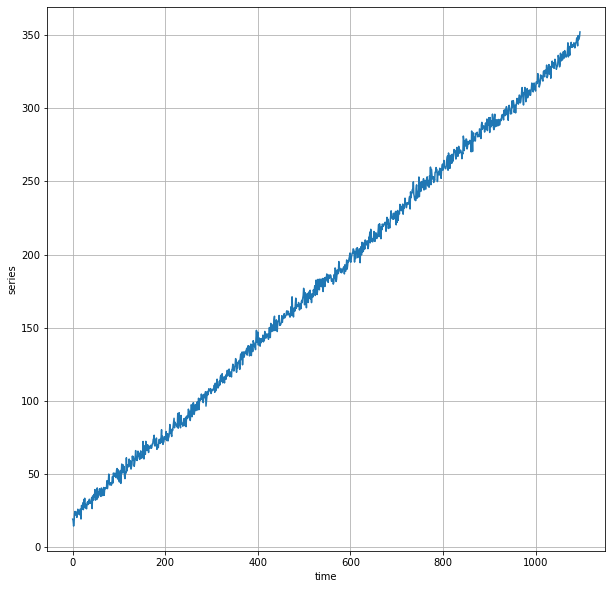

In [52]:
baseline = 10
series = baseline + trend(time,slope=0.3)+seasonality(time)+noise(time)
plot_series(time,series)

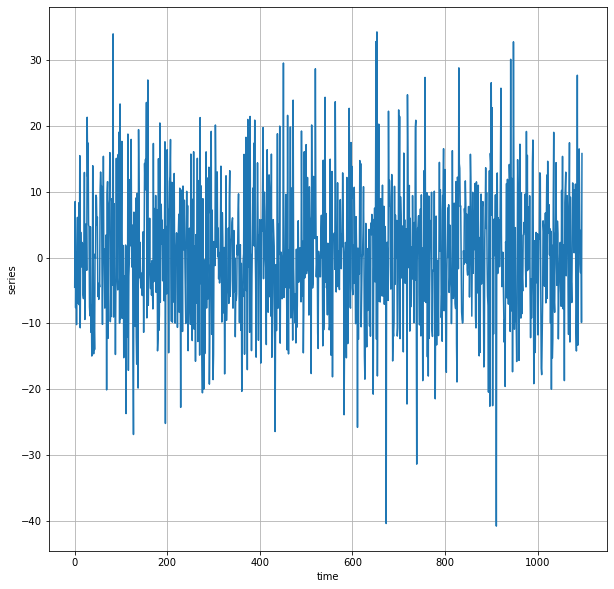

In [46]:
plot_series(time,noise(time))

In [66]:
def autocorrelation(time,amplitude=100,shift=10):
    rho=0.9
    ar = np.random.randn(len(time)+shift)
    for step in range(shift,len(ar[shift:])+shift):
        ar[step]+= rho* ar[step-shift]
        
    return ar[shift:] * amplitude

In [67]:
series= autocorrelation(time)

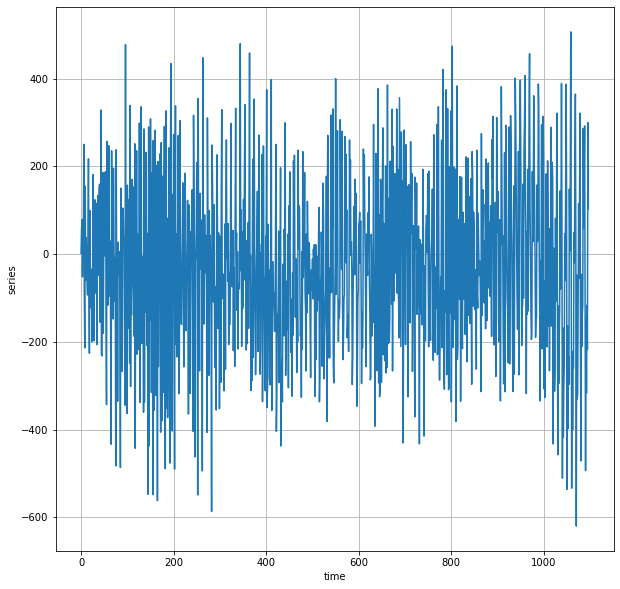

In [68]:
plot_series(time,series)

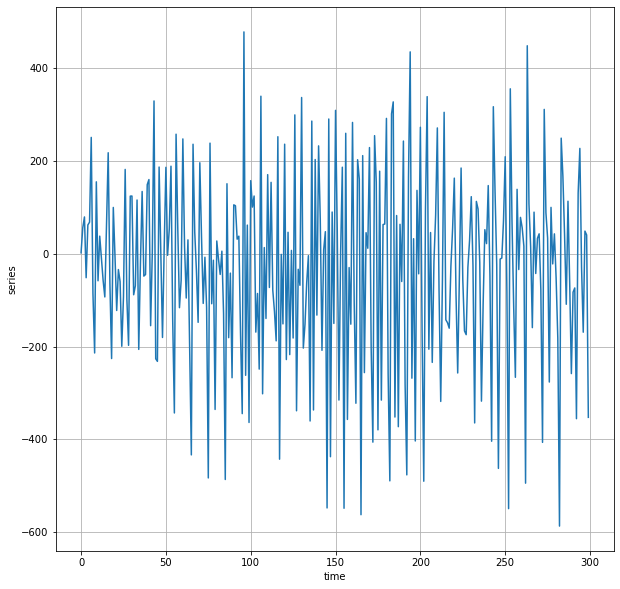

In [69]:
plot_series(time[:300],series[:300])

In [74]:
def autocorrelation(time,amplitude):
    rho=0.3
    shift =5
    ar = np.random.randn(len(time)+shift)
#     plot_series(time,ar[shift:])
    for step in range(1,len(time)+shift):
        ar[step]+= rho*ar[step-shift]
#         ar[step]+= rho*ar[step-3]
        
    return ar[shift:]* amplitude

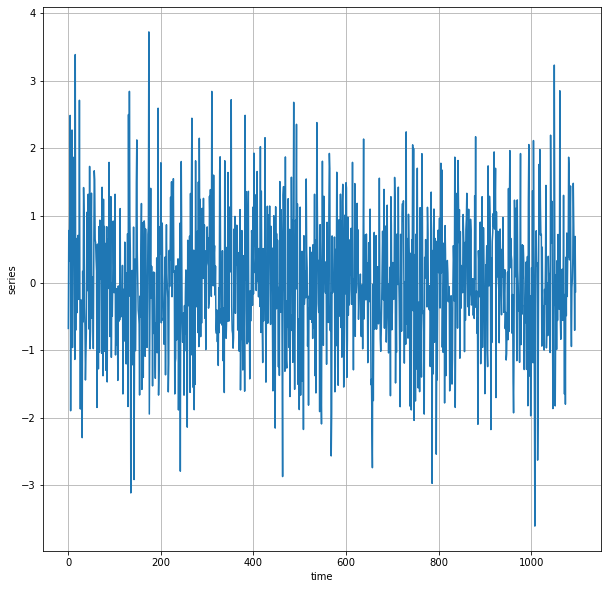

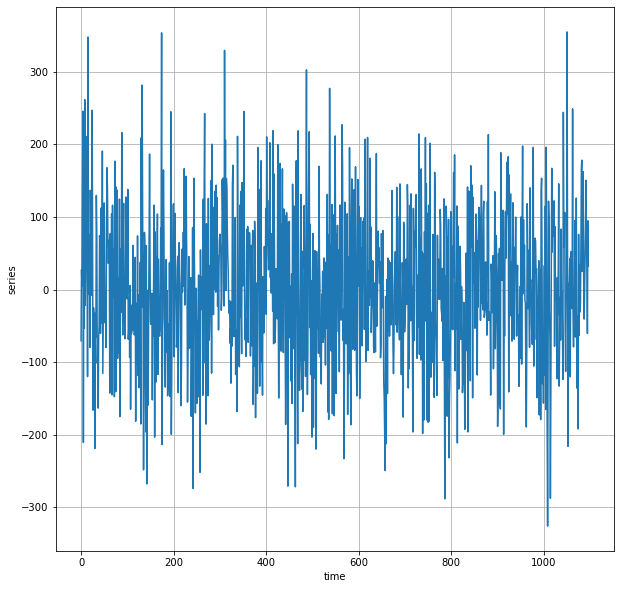

In [71]:
plot_series(time,autocorrelation(time,amplitude))

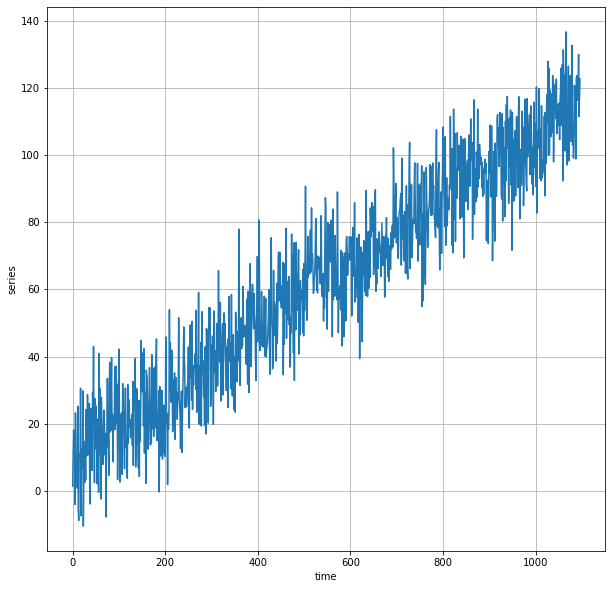

In [76]:
series = autocorrelation(time,amplitude=10) + trend(time)+seasonality(time)
plot_series(time,series)

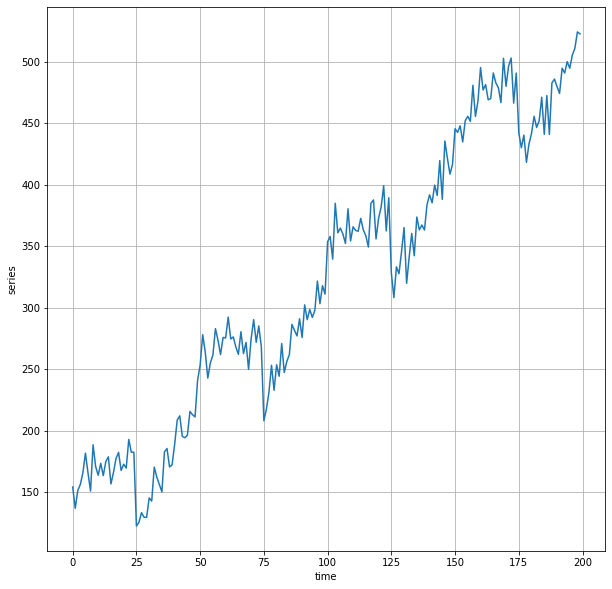

In [77]:
series = autocorrelation(time, 10) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
plot_series(time[:200], series[:200])

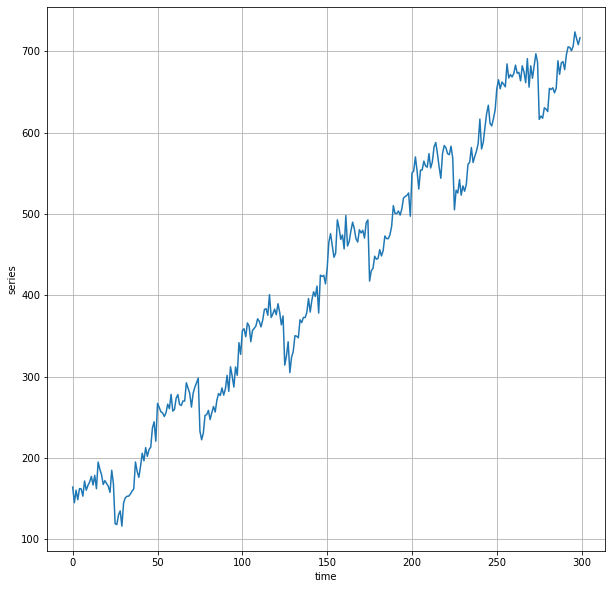

In [79]:
series = autocorrelation(time, 10) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
# series2 = autocorrelation(time, 5) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550
# series[200:] = series2[200:]
#series += noise(time, 30)
plot_series(time[:300], series[:300])

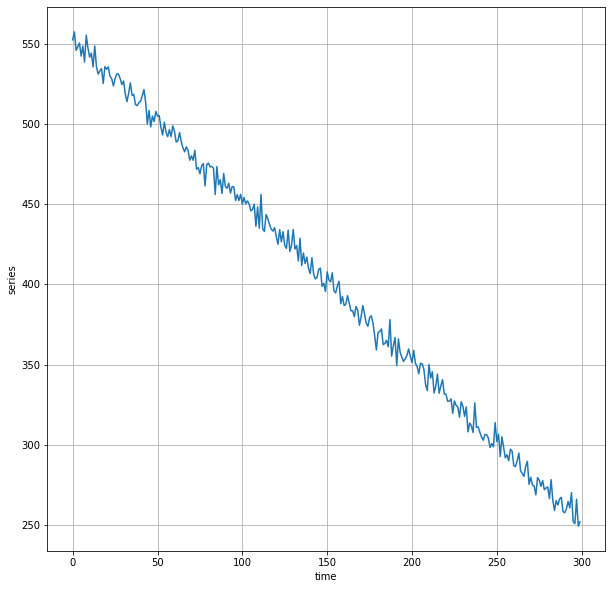

In [80]:
series2 = autocorrelation(time, 5) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550
plot_series(time[:300], series2[:300])

In [82]:
len(series2),len(series)

(1097, 1097)

In [83]:
series3 = series
series3[len(series)//2:] = series2[len(series)//2:]

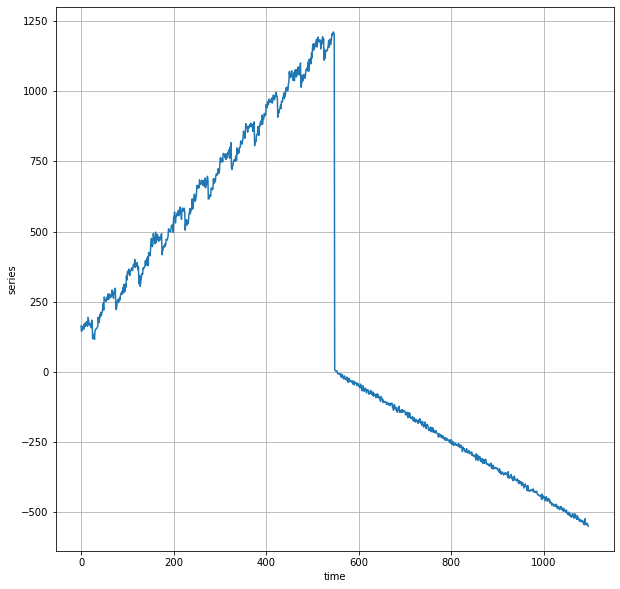

In [84]:
plot_series(time,series3)